In [1]:
import zillow
import pprint
import zipcode
from address import AddressParser, Address
%matplotlib inline
import matplotlib.pyplot as plt


# In[2]:

with open('out3.txt') as f:
    addr_houses = f.readlines()


# In[3]:

addr_houses = [x.strip() for x in addr_houses] 


# In[4]:

#addr_houses[0:3]


# In[5]:

#addr_houses[3][:-5]


# In[6]:

#addr_houses[3][-5:]


# In[7]:

vars_extended_data = {'bathrooms', 'bedrooms', 'finished_sqft', 'last_sold_date', 'last_sold_price', 'lot_size_sqft', 'tax_assessment', 'tax_assessment_year', 'usecode', 'year_built'}
vars_full_address  = {'latitude', 'longitude'}
vars_zestimate     = {'amount','amount_change_30days'}
# In[8]:

#address = "5164 Gallatin Pl, Boulder, CO"
#postal_code = "80303"
#n = 0

# allocate vars
data_out = dict()

for v in vars_extended_data:
    data_out[v] = []
for v in vars_full_address:
    data_out[v] = []
for v in vars_zestimate:
    data_out[v] = []

for nm in addr_houses:
    address = nm[:-5]
    postal_code = nm[-5:]
    #if __name__=="__main__":
    key = ""
    with open("/Users/giglio/Desktop/ACC_JISAO/code/zillow_us/zillow_env/bin/config/zillow_key.conf", 'r') as f:
        key = f.readline().replace("\n", "")

    api = zillow.ValuationApi()
    data = api.GetDeepSearchResults(key, address, postal_code)

    # pp = pprint.PrettyPrinter(indent=4)
    # pp.pprint(data.get_dict())

    for v in vars_extended_data:
        data_out[v].append(getattr(data.extended_data,v))

    for v in vars_full_address:
        data_out[v].append(getattr(data.full_address,v))

    for v in vars_zestimate:
        data_out[v].append(getattr(data.zestimate,v))

    # for v in vars_extended_data:
    #     if n==0:
    #         data_out[v] = getattr(data.extended_data,v)
    #         data_out
    #     else:
    #         data_out[v] = [data_out[v], (getattr(data.extended_data,v))]
    #
    # n = n+1


# In[9]:

for v in data_out.keys():
    print(v)
    print(data_out[v])
    

amount
[822694, 723022, 722336, 503982, 504321, 968684, 798104, 899697, 616180, 515820, 640535, 711826, 890224, 617984, 840146, 620984, 850691, 854731, 859423, 500595, 736072, 722023, 567973, 714162, 738482]
longitude
['-105.251649', '-105.23465', '-105.34095', '-105.137352', '-105.435145', '-105.282296', '-105.255903', '-105.32766', '-105.294179', '-105.179773', '-105.200259', '-105.253603', '-105.176518', '-105.260041', '-105.259785', '-105.259252', '-105.294492', '-105.180356', '-105.258903', '-105.177428', '-105.336349', '-105.182895', '-105.172934', '-105.384', '-105.332339']
latitude
['40.045145', '40.006615', '40.073802', '40.011251', '40.007198', '40.004448', '39.976379', '39.958143', '40.128066', '40.074833', '40.05623', '39.973506', '39.991908', '39.99554', '40.042657', '39.994573', '40.124327', '40.053978', '40.040883', '40.05563', '40.092029', '40.068334', '40.060154', '40.045082', '40.079664']
bathrooms
['3.0', '3.0', '2.0', '4.0', '2.0', '3.0', '2.0', '3.0', '2.0', '2.0',

In [2]:
print(data_out['amount'])

[822694, 723022, 722336, 503982, 504321, 968684, 798104, 899697, 616180, 515820, 640535, 711826, 890224, 617984, 840146, 620984, 850691, 854731, 859423, 500595, 736072, 722023, 567973, 714162, 738482]


In [3]:
type(data_out['amount'])

list

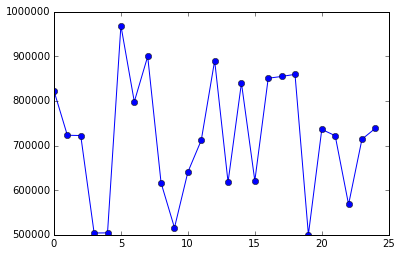

In [9]:
plt.plot(data_out['amount'],'-o')
plt.show()

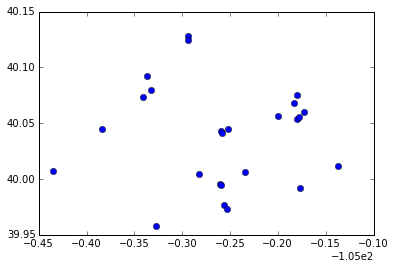

In [7]:
plt.plot(data_out['longitude'],data_out['latitude'],'o')
plt.show()